<a href="https://colab.research.google.com/github/gopal2812/convandgpt/blob/main/Submission7/Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/convandgpt/
!git clone https://github.com/gopal2812/convandgpt.git
import os

Cloning into 'convandgpt'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 66 (delta 28), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (66/66), 215.71 KiB | 2.70 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
os.chdir("/content/convandgpt/Submission7")

In [3]:
!pwd;ls

/content/convandgpt/Submission7
Model1.ipynb  model.py	utils.py


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from utils import train, test
import torch.nn.functional as F
from model import Model_2

!pip install torchsummary
from torchsummary import summary


In [5]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
model = Model_2().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             910
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 11, 22, 22]           1,001
              ReLU-8           [-1, 11, 22, 22]               0
       BatchNorm2d-9           [-1, 11, 22, 22]              22
           Conv2d-10           [-1, 10, 11, 11]             120
             ReLU-11           [-1, 10, 11, 11]               0
           Conv2d-12             [-1, 10, 9, 9]             910
             ReLU-13             [-1, 10, 9, 9]               0
      BatchNorm2d-14             [-1, 1

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
batch_size = 64
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.05),
    #transforms.RandomResizedCrop(size=(27, 27)),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-12., 12.), fill=0),
    transforms.RandomAffine(degrees=5, shear=5, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 73826802.08it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73017295.86it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29712159.56it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6968006.13it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



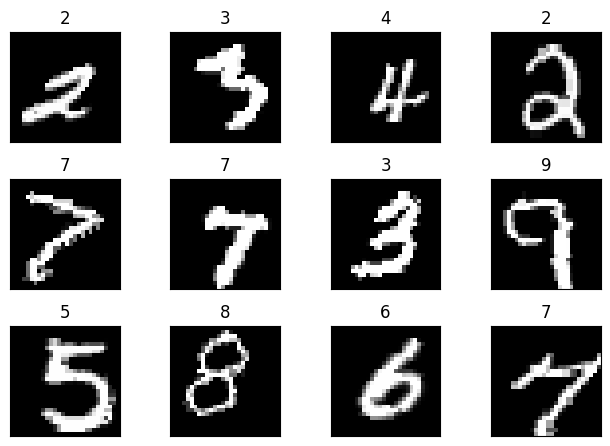

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [9]:
# New Line
num_epochs = 15
l1_factor=0
l2_factor=0
epochs = 15
from torch.optim.lr_scheduler import StepLR,OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.025, momentum=0.97,weight_decay=l2_factor)
scheduler = OneCycleLR(optimizer, max_lr=0.025,epochs=epochs,steps_per_epoch=len(train_loader))

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train(model, device, train_loader, optimizer, epoch, train_accuracy, train_losses, l1_factor,scheduler)
    test(model, device, test_loader,test_accuracy,test_losses)


Epoch 1:


Loss=0.15585759282112122 Batch_id=937 Accuracy=69.79: 100%|██████████| 938/938 [01:06<00:00, 14.18it/s]



Test set: Average loss: 0.1161, Accuracy: 9664/10000 (96.64%)

Epoch 2:


Loss=0.03299623355269432 Batch_id=937 Accuracy=93.48: 100%|██████████| 938/938 [00:57<00:00, 16.24it/s]



Test set: Average loss: 0.0479, Accuracy: 9860/10000 (98.60%)

Epoch 3:


Loss=0.12719117105007172 Batch_id=937 Accuracy=95.52: 100%|██████████| 938/938 [00:57<00:00, 16.31it/s]



Test set: Average loss: 0.0506, Accuracy: 9858/10000 (98.58%)

Epoch 4:


Loss=0.06991494446992874 Batch_id=937 Accuracy=96.18: 100%|██████████| 938/938 [00:57<00:00, 16.40it/s]



Test set: Average loss: 0.0385, Accuracy: 9866/10000 (98.66%)

Epoch 5:


Loss=0.03738822415471077 Batch_id=937 Accuracy=96.70: 100%|██████████| 938/938 [00:57<00:00, 16.39it/s]



Test set: Average loss: 0.0312, Accuracy: 9897/10000 (98.97%)

Epoch 6:


Loss=0.15769876539707184 Batch_id=937 Accuracy=96.81: 100%|██████████| 938/938 [00:57<00:00, 16.41it/s]



Test set: Average loss: 0.0294, Accuracy: 9907/10000 (99.07%)

Epoch 7:


Loss=0.021303003653883934 Batch_id=937 Accuracy=97.14: 100%|██████████| 938/938 [01:02<00:00, 15.05it/s]



Test set: Average loss: 0.0243, Accuracy: 9918/10000 (99.18%)

Epoch 8:


Loss=0.09276235848665237 Batch_id=937 Accuracy=97.42: 100%|██████████| 938/938 [01:07<00:00, 13.82it/s]



Test set: Average loss: 0.0264, Accuracy: 9921/10000 (99.21%)

Epoch 9:


Loss=0.06367085129022598 Batch_id=937 Accuracy=97.40: 100%|██████████| 938/938 [01:02<00:00, 15.05it/s]



Test set: Average loss: 0.0227, Accuracy: 9929/10000 (99.29%)

Epoch 10:


Loss=0.12440953403711319 Batch_id=937 Accuracy=97.61: 100%|██████████| 938/938 [01:00<00:00, 15.50it/s]



Test set: Average loss: 0.0209, Accuracy: 9937/10000 (99.37%)

Epoch 11:


Loss=0.1513642519712448 Batch_id=937 Accuracy=97.64: 100%|██████████| 938/938 [01:00<00:00, 15.38it/s]



Test set: Average loss: 0.0200, Accuracy: 9941/10000 (99.41%)

Epoch 12:


Loss=0.10028906911611557 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [01:00<00:00, 15.58it/s]



Test set: Average loss: 0.0185, Accuracy: 9943/10000 (99.43%)

Epoch 13:


Loss=0.031033258885145187 Batch_id=937 Accuracy=97.94: 100%|██████████| 938/938 [01:01<00:00, 15.21it/s]



Test set: Average loss: 0.0177, Accuracy: 9942/10000 (99.42%)

Epoch 14:


Loss=0.024644793942570686 Batch_id=937 Accuracy=98.16: 100%|██████████| 938/938 [01:01<00:00, 15.17it/s]



Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

Epoch 15:


Loss=0.013415592722594738 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [01:05<00:00, 14.21it/s]



Test set: Average loss: 0.0167, Accuracy: 9942/10000 (99.42%)



## Model 2

#Target
Check the performance of the a middle-ground. model with reasonable structure for the problem and fewer parameters

Try the same structure from model1, but less parameters at the end.
Have network parameter further less than 7K. Have increased the LR and also does the data augmentation.

`train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.05),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-12., 12.), fill=0),
    transforms.RandomAffine(degrees=5, shear=5, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])
`
#Results

Train Acc: 97.94

Test Acc: 99.42

Parameters: 6.3k

#Analysis

The model seems to be achieving the goal very well and consistently with 6.3K parameters!Image augmentation helps in improving accuracy.

